This excercise is to follow along with discussion https://www.kaggle.com/tboyle10/methods-for-dealing-with-imbalanced-data/notebook and https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


#### Methods for Dealing with Imbalanced Data
Imbalanced classes are a common problem in machine learning classification where there are a disproportionate ratio of observations in each class. Class imbalance can be found in many different areas including medical diagnosis, spam filtering, and fraud detection.

In this guide, we'll look at five possible ways to handle an imbalanced class problem using credit card data. Our objective will be to correctly classify the minority class of fraudulent transactions.

Important Note: This guide will focus soley on addressing imbalanced classes and will not addressing other important machine learning steps including, but not limited to, feature selection or hyperparameter tuning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

In [2]:
# setting up default plotting parameters
%matplotlib inline

plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [3]:
# read in data
df = pd.read_csv('creditcard.csv')

print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(df.Class.value_counts())

0    284315
1       492
Name: Class, dtype: int64


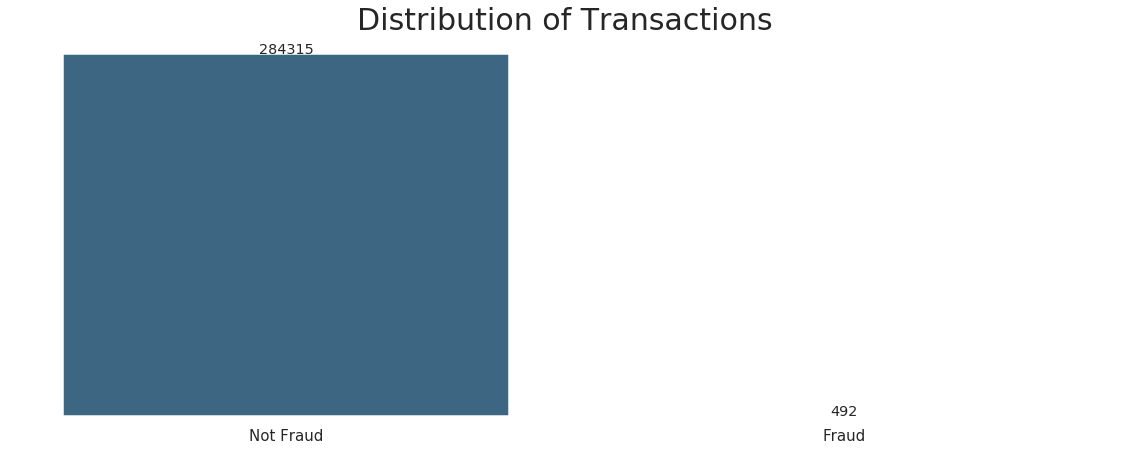

In [5]:
# using seaborns countplot to show distribution of questions in dataset
fig, ax = plt.subplots()
g = sns.countplot(df.Class, palette='viridis')
g.set_xticklabels(['Not Fraud', 'Fraud'])
g.set_yticklabels([])

# function to show values on bars
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
show_values_on_bars(ax)

sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Transactions', fontsize=30)
plt.tick_params(axis='x', which='major', labelsize=15)
plt.show()

In [6]:
# print percentage of questions where target == 1
(len(df.loc[df.Class==1]))/(len(df.loc[df.Class==0]))*100

0.17304750013189596

From the plot above, we can see we have a very imbalanced class - just 0.17% of our dataset belong to the target class!

This is a problem because many machine learning models are designed to maximize overall accuracy, which especially with imbalanced classes may not be the best metric to use. Classification accuracy is defined as the number of correct predictions divided by total predictions times 100. For example, if we simply predicted all transactions are not fraud, we would get a classification acuracy score of over 99%!

In [7]:
# Prepare data for modeling
# Separate input features and target
y=df.Class
X=df.drop('Class',axis=1)

# setting up train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=100)

In [8]:
# baseline model
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))


Unique predicted labels:  [0]
Test score:  0.9982865649841297


As predicted our accuracy score for classifying all transactions as not fraud is 99.8%!

As the Dummy Classifier predicts only Class 0, it is clearly not a good option for our objective of correctly classifying fraudulent transactions.

Let's see how logistic regression performs on this dataset.

In [9]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# predict on training set 
lr_pred = lr.predict(X_test)

#checking accuracy 
print(accuracy_score(y_test, lr_pred))

# checking unique values
predictions = pd.DataFrame(lr_pred)
#predictions.head()
predictions[0].value_counts()

0.9989326142524086


0    71116
1       86
Name: 0, dtype: int64

Maybe not surprisingly, our accuracy score decreased as compared to the dummy classifier above. This tells us that either we did something wrong in our logistic regression model, or that accuracy might not be our best option for measuring performance.

Let’s take a look at some popular methods for dealing with class imbalance.

1. `Change the performance metric`
As we saw above, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:
###### Confusion Matrix: 
a table showing correct predictions and types of incorrect predictions.
###### Precision: 
the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
###### Recall: 
the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
###### F1: Score: 
the weighted average of precision and recall.

Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

In [10]:
def f1_recall_accuracy_score(y_test,model_pred):
    # f1 score
    print(f"f1_score:    " + str(f1_score(y_test, model_pred)))

    # recall score
    print("recall_score: " + str(recall_score(y_test, model_pred)))
    
    # accuracy score
    print("accuracy_score: " + str(accuracy_score(y_test, model_pred)))

f1_recall_accuracy_score(y_test,lr_pred)

f1_score:    0.6346153846153847
recall_score: 0.5409836065573771
accuracy_score: 0.9989326142524086


2. `Change the algorithm`
While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train,y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71080
           1       0.94      0.71      0.81       122

    accuracy                           1.00     71202
   macro avg       0.97      0.86      0.90     71202
weighted avg       1.00      1.00      1.00     71202



In [12]:
f1_recall_accuracy_score(y_test,rfc_pred)

f1_score:    0.8093023255813954
recall_score: 0.7131147540983607
accuracy_score: 0.9994241734782731


Both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

3. `Resampling Techniques — Oversample minority class`

Our next method begins our resampling techniques.
Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.
We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

##### Important Note

Always split into test and train sets BEFORE trying oversampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets. This can allow our model to simply memorize specific data points and cause overfitting and poor generalization to the test data.


In [13]:
from sklearn.utils import resample

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [14]:
# separate minority and majority classes
not_fraud = df[df.Class==0]
fraud = df[df.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()
    

1    284315
0    284315
Name: Class, dtype: int64

After resampling we have an equal ratio of data points for each class! Let’s try our logistic regression again with the balanced training data.

In [15]:
# trying logisticregression again with the balanced data set 
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

# model
upsampled_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

# predict
upsampled_pred = upsampled_lr.predict(X_test)

# checking classification scores
f1_recall_accuracy_score(y_test,upsampled_pred)

f1_score:    0.11289537712895377
recall_score: 0.8787878787878788
accuracy_score: 0.9743967866071178


Our recall score increased, but F1 is much lower than with either our baseline logistic regression or random forest from above. Let’s see if undersampling might perform better here.

4. `Resampling techniques — Undersample majority class`

Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback is that we are removing information that may be valuable. This could lead to underfitting and poor generalization to the test set.
We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.

In [16]:
# still using our separated classes fraud and not_fraud from above

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()

1    492
0    492
Name: Class, dtype: int64

Again, we have an equal ratio of fraud to not fraud data points, but in this case a much smaller quantity of data to train the model on. Let’s again apply our logistic regression.

In [17]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled_lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled_lr.predict(X_test)

# checking classification scores
f1_recall_accuracy_score(y_test,undersampled_pred)

f1_score:    0.12413055109684323
recall_score: 0.8787878787878788
accuracy_score: 0.9770090727788545


Undersampling underperformed oversampling in this case. Let’s try one more method for handling imbalanced data.

5. `Generate synthetic samples`

A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [19]:
import imblearn
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = df.Class
X = df.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

#sm = SMOTE(random_state=27, ratio=1.0)
sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

After generating our synthetic data points, let’s see how our logistic regression performs.

In [20]:
smote_lr = LogisticRegression(solver='liblinear').fit(X_train,y_train)

smote_pred = smote_lr.predict(X_test)

# checking classification scores
f1_recall_accuracy_score(y_test,undersampled_pred)

f1_score:    0.12413055109684323
recall_score: 0.8787878787878788
accuracy_score: 0.9770090727788545


We explored 5 different methods for dealing with imbalanced datasets:
- Change the performance metric
- Change the algorithm
- Oversample minority class
- Undersample majority class
- Generate synthetic samples using SMOTE 

It appears for this particular dataset random forest and SMOTE are among the best of the options we tried here.

These are just some of the many possible methods to try when dealing with imbalanced datasets, and not an exhaustive list. Some others methods to consider are collecting more data or choosing different resampling ratios — you don’t have to have exactly a 1:1 ratio!

You should always try several approaches and then decide which is best for your problem.
